# Users behaviour on The Ford GoBike sharing system
by Abeer AL-Mashjari

## 1- Introduction 

####  About the  Ford GoBike :
<p>San Francisco Ford GoBike , managed by Motivate, provides the Bay Area’s bike share system. Bike share is a convenient, healthy, affordable, and fun form of transportation. It involves a fleet of specially designed bikes that are locked into a network of docking stations. Bikes can be unlocked from one station and returned to any other station in the system. People use bike share to commute to work or school, run errands, get to appointments, and more. The dataset contains trip data from 2017-2019, including start time, end time, start station, end station, and latitude/longitude for each station. See detailed metadata for historical and real-time data .</p>

####  About the investgation :
<p> I Gather the data localy after downloading it from the website:<a> https://s3.amazonaws.com/baywheels-data/index.html </a> provided by udacity , I choose the Ford go bike sharing system files from the january until May of 2019. Basically I focused on different user type behavior.</p>   

In [20]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
%matplotlib inline
import datetime
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read data locally form monthe 1 to 5 of 2019 
fordgobike_2019_clean = pd.read_csv('fordgobike_2019_clean.csv')

## 2- Assessing data

In [14]:
#expolor data
fordgobike_2019.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,1989.0,Male,No
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,1989.0,Male,No
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,1965.0,Female,No
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,1974.0,Male,No
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,NaN,NaN,No


In [9]:
fordgobike_2019.shape

(1053067, 16)

## Percentage of User type for Ford GoBike sharing system

### The system rint bikes for two types of clients: Subscribers Subscriber membership are making 88.6% of all riders in 2019 and Customers  are making 11.4% . 

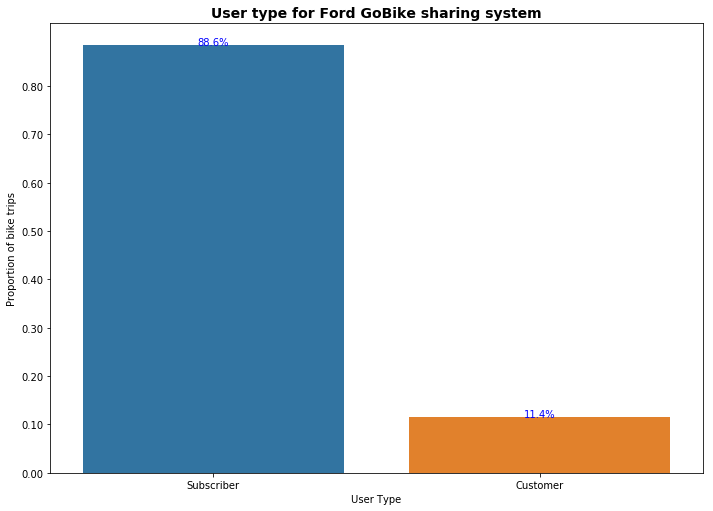

In [13]:
plt.figure(figsize=[ 11.69, 8.27])
#order=fordgobike_2019_clean.user_type.value_counts().index
chart=sb.countplot(data = fordgobike_2019_clean , x = 'user_type');
labels = ['Customer', 'Subscriber']
plt.title('User type for Ford GoBike sharing system',fontsize=14, fontweight='bold',y=1.);
# get proportion taken by most common group for derivation
# of tick marks
n_points = fordgobike_2019_clean.shape[0]
max_count = fordgobike_2019_clean['user_type'].value_counts().max()
max_prop = max_count / n_points
# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.10);
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = fordgobike_2019_clean, x = 'user_type')
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('Proportion of bike trips');
plt.xlabel('User Type');

# add annotations
n_points = fordgobike_2019_clean.shape[0]
counts = fordgobike_2019_clean['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'B')

## Percentage of member genders for Ford GoBike sharing system

### Mainly males are the most used of the system by 74.2% than the female with 23.8% .

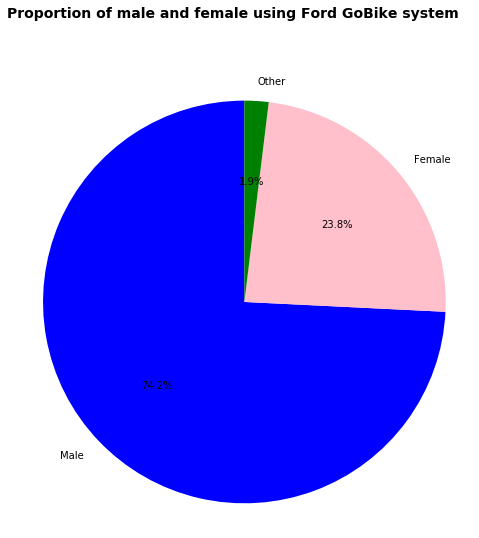

In [15]:
plt.figure(figsize=[ 11.69, 8.27])
sorted_counts = fordgobike_2019_clean['member_gender'].value_counts()
colors = ['blue', 'pink','green']
plt.pie(sorted_counts, labels=sorted_counts.index, colors = colors,autopct='%1.1f%%', startangle=90)
plt.axis('square')
plt.suptitle('Proportion of male and female using Ford GoBike system', y=1,fontsize=14, fontweight='bold');

## The Ford GoBike System - Age Group

### The most common age group to use the bike sharing system who are between 25-35 years old for all user type . 

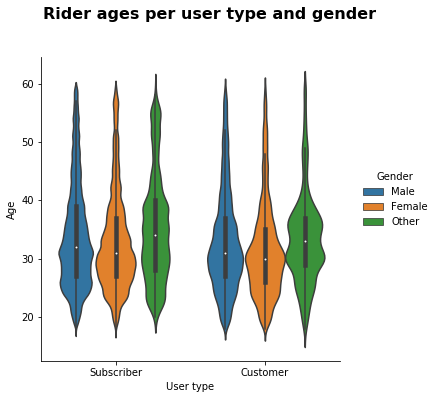

In [19]:
data = fordgobike_2019_clean.query('member_age < 60')
g = sb.catplot(data= data, x='user_type', y='member_age' , hue='member_gender' , kind='violin' );
g.set_axis_labels("User type", "Age")
g._legend.set_title('Gender');
g.fig.suptitle('Rider ages per user type and gender', y=1.10, fontsize=16 , fontweight='bold');

## The Ford GoBike System - Monthly usage per user type and gender

### Generally increase through the year when they reach their first peek in March for both user type , then slightly decreased in April and May, it shows that adultes males prefer this way of transportation than female .




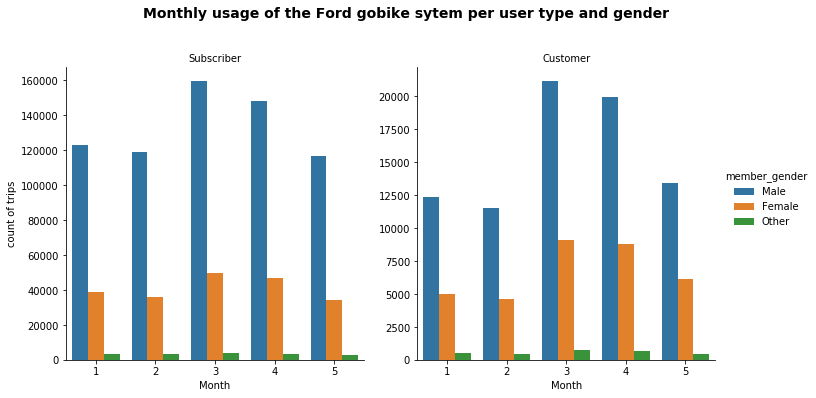

In [22]:
g = sns.catplot(data=fordgobike_2019_clean, x='start_month', col="user_type", hue="member_gender" , kind='count' ,sharey = False )
g.set_axis_labels('Month', 'count of trips')
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage of the Ford gobike sytem per user type and gender ',y=1.10 ,fontsize=14,fontweight='bold');

## The Ford GoBike System -Hourly usage per user type and gender

### The system shows the behaviour of working adult , they use this services as a subscriber around the peak hour 8 am to go to their work and go back to home at 5 pm. About the Customers thire peak hour is 5 pm which shows that most of this type are usually tourists.





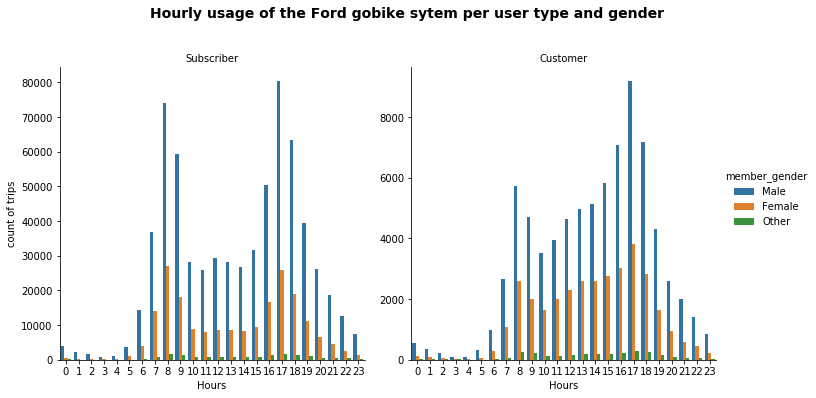

In [24]:
g = sns.catplot(data=fordgobike_2019_clean, x='start_hour', col="user_type", hue="member_gender" , kind='count',sharey = False  )
g.set_axis_labels('Hours', 'count of trips')
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the Ford gobike sytem per user type and gender ',y=1.10 ,fontsize=14,fontweight='bold');

## The Ford GoBike System - Averag trip duration per user type and gender

### There is a diffrents between the user type and mainly goes for the use of the system as mention before we found that the subscriber are most often uses the system to work or school thats way the trip durtion took less than 15 mintes .in the other hand , the customers are taking more than that reach up to 20 mints exploring the city as they usualy tourist and again thers is no diffrent in genders .

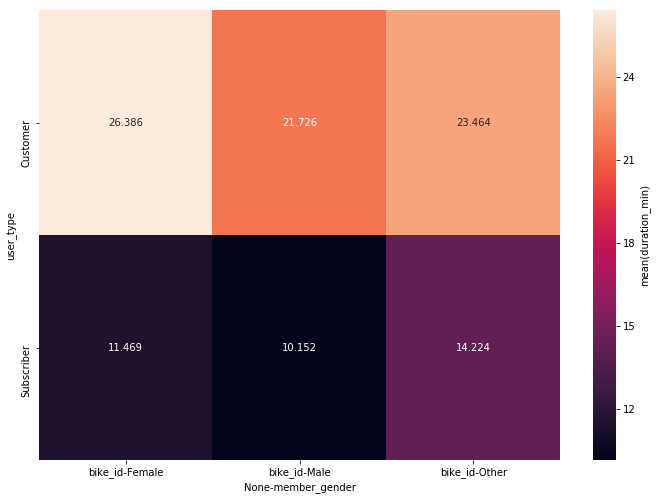

In [9]:
plt.figure(figsize=[ 11.69, 8.27])
means =fordgobike_2019_clean.groupby(['user_type', 'member_gender']).mean()['duration_min']
means = means.reset_index(name = 'bike_id')
means = means.pivot(index = 'user_type', columns = 'member_gender',)
sb.heatmap(means, annot = True, fmt = '.3f',cbar_kws = {'label' : 'mean(duration_min)'});


# Conclusion

### The Ford gobike sytem works from San Francisco to rint bikes for two types of clients using the system: Subscribers and Customers.
The behaviour of user types : 
<li> - Subscribers are the main users :</li> 
Most bike rides are around the peak hours 8-9am and 5-6pm ,mostly rent in march and the most gender are the adult males there age around 20-40
<li>-Customers are usually tourists ,not often use the system : </li> 
Mostly they uesd ths system around 8-9am and 5-6pm ,in march and the most are also adult males there age around 20-40.
    

### References:

https://console.cloud.google.com/marketplace/details/san-francisco-public-data/sf-bike-share?filter=solution-type:dataset&filter=category:transportation&id=3ff66be9-b024-4500-b61a-385851b5be96&pli=1

https://www.lyft.com/bikes

In [1]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 475692 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slide_deck_template.slides.html
Use Control-C to stop this server
^C

Interrupted
